In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
X_MIN, X_MAX = -10, 10
U_MIN, U_MAX = -1, 1

W_MIN, W_MAX = -0.05, 0.05

# sampling period
TO = 0.1

# starting point
# start_pos = np.array([-10, 10])
start_pos = np.random.uniform(X_MIN, X_MAX, size=2)

# target point (goal)
# target_pos = np.array([7.5, -7.5])
target_pos = np.random.uniform(X_MIN, X_MAX, size=2)

# gain
Kp = 25

x_ref = np.array([(x, np.sqrt(x)) for x in np.linspace(0, 10, 1000)])

total_time = 20
steps = int(total_time / TO)

In [ ]:
for loop

array([[ 0.        ,  0.        ],
       [ 0.01001001,  0.10005004],
       [ 0.02002002,  0.14149212],
       ...,
       [ 9.97997998,  3.15911063],
       [ 9.98998999,  3.16069454],
       [10.        ,  3.16227766]])

In [78]:
def get_control_input(curr_pos, target):
    err = target - curr_pos

    u = Kp * err
    u = np.clip(u, U_MIN, U_MAX)

    return u

In [79]:
trajectory = np.zeros((steps, 2))
trajectory[0] = start_pos

# simulation
for t in range(1, steps):
    curr_pos = trajectory[t - 1]
    
    u_t = get_control_input(curr_pos, target_pos)

    w_t = np.random.uniform(-W_MIN, W_MAX, size=2)

    new_pos = curr_pos + TO * (u_t + w_t)
    new_pos = np.clip(new_pos, X_MIN, X_MAX)

    trajectory[t] = new_pos

### Plotting

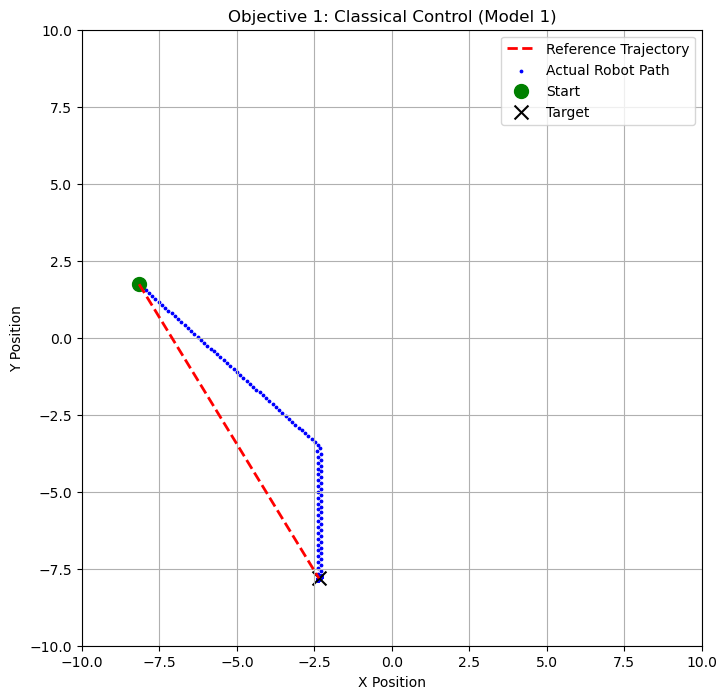

In [80]:
plt.figure(figsize=(8, 8))

plt.plot([start_pos[0], target_pos[0]], [start_pos[1], target_pos[1]], 
         'r--', linewidth=2, label='Reference Trajectory')

plt.scatter(trajectory[:, 0], trajectory[:, 1], s=3, c='blue', label='Actual Robot Path')

plt.scatter(start_pos[0], start_pos[1], c='green', s=100, label='Start')
plt.scatter(target_pos[0], target_pos[1], c='black', marker='x', s=100, label='Target')

plt.title('Objective 1: Classical Control (Model 1)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.grid(True)
plt.xlim(X_MIN, X_MAX)
plt.ylim(X_MIN, X_MAX)
plt.show()

In [87]:
import numpy as np
import matplotlib.pyplot as plt

def run_simulation():
    # --- 1. System Configuration ---
    dt = 0.05              # Time step (seconds)
    total_time = 15.0      # Duration
    steps = int(total_time / dt)

    # State: [x, y]
    x = np.array([0.0, 0.0])  # Initial Position
    
    # Control Gain Matrix (Pole Placement at -2.0)
    # A = 0, B = I. We want eig(A-BK) = -2. So K = 2*I.
    K = np.array([[2.0, 0.0], 
                  [0.0, 2.0]])


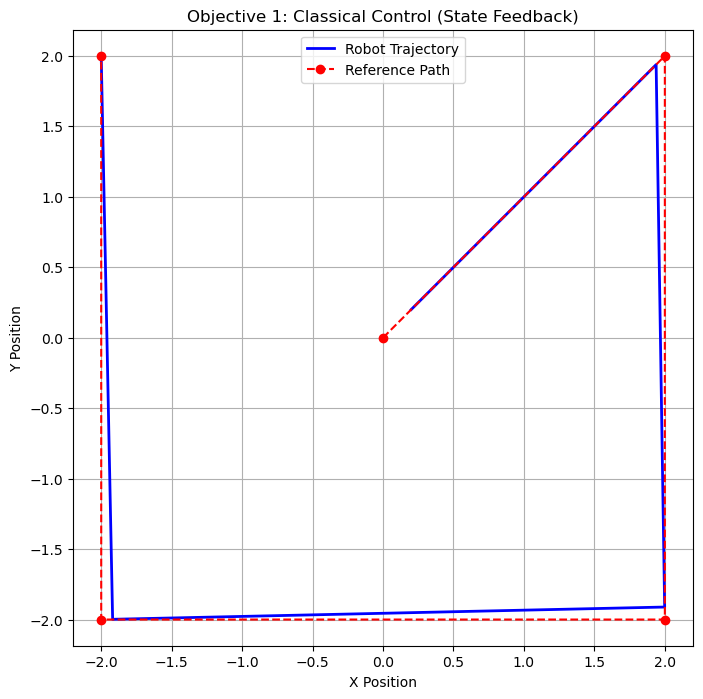

In [89]:
import numpy as np
import matplotlib.pyplot as plt

def run_simulation():
    # --- 1. System Configuration ---
    dt = 0.05              # Time step (seconds)
    total_time = 15.0      # Duration
    steps = int(total_time / dt)

    # State: [x, y]
    x = np.array([0.0, 0.0])  # Initial Position
    
    # Control Gain Matrix (Pole Placement at -2.0)
    # A = 0, B = I. We want eig(A-BK) = -2. So K = 2*I.
    K = np.array([[2.0, 0.0], 
                  [0.0, 2.0]])

    # Define a Reference Trajectory (Waypoints: Square)
    waypoints = [
        np.array([0.0, 0.0]),
        np.array([2.0, 2.0]),
        np.array([2.0, -2.0]),
        np.array([-2.0, -2.0]),
        np.array([-2.0, 2.0])
    ]
    wp_index = 1 # Start tracking the second point
    threshold = 0.1 # Distance to switch to next waypoint

    # Data Logging
    log_x, log_y = [], []
    ref_x, ref_y = [], []

    # --- 2. Simulation Loop ---
    for t in range(steps):
        # A. Determine Reference (x_ref)
        target = waypoints[wp_index]
        
        # B. Calculate Error (e = x - x_ref)
        error = x - target
        
        # C. State Feedback Control Law (u = -K * e)
        # Using @ for matrix multiplication
        u = -K @ error
        
        # D. Physics Update (Euler Integration: x_new = x + u*dt)
        x = x + u * dt

        # E. Logic: Switch waypoint if close enough
        dist = np.linalg.norm(error)
        if dist < threshold and wp_index < len(waypoints) - 1:
            wp_index += 1

        # F. Logging
        log_x.append(x[0])
        log_y.append(x[1])
        ref_x.append(target[0])
        ref_y.append(target[1])

    # --- 3. Visualization ---
    plt.figure(figsize=(8, 8))
    
    # Plot Path
    plt.plot(log_x, log_y, 'b-', linewidth=2, label='Robot Trajectory')
    plt.plot([w[0] for w in waypoints], [w[1] for w in waypoints], 'r--', marker='o', label='Reference Path')
    
    # Styling
    plt.title('Objective 1: Classical Control (State Feedback)')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

run_simulation()

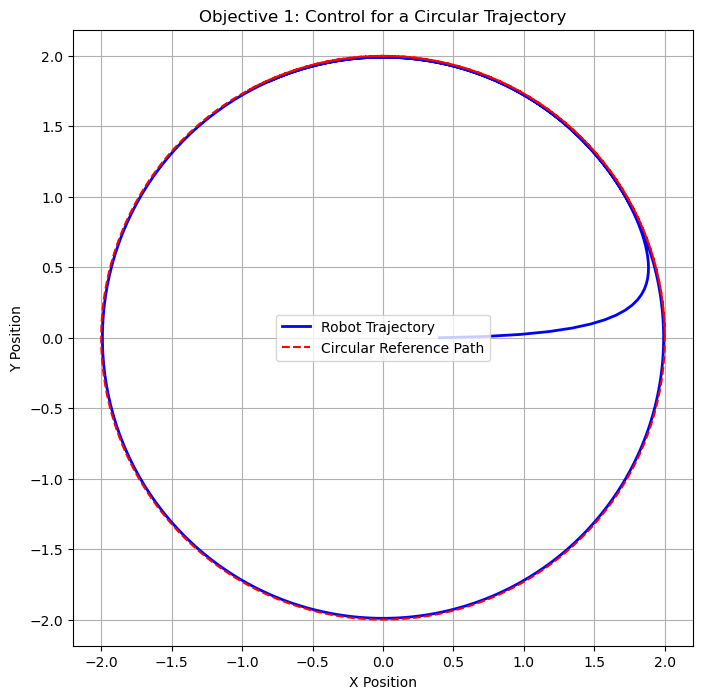

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def run_circle_simulation():
    # --- 1. System & Trajectory Configuration ---
    dt = 0.05
    total_time = 20.0
    steps = int(total_time / dt)

    # System State and Control
    # x = np.array([2.0, 0.5])  # Initial Position (slightly off the circle)
    x = np.array([0.0, 0.0])  # Initial Position (slightly off the circle)
    K = np.array([[4, 0.0], [0.0, 4]]) # A slightly higher gain for better tracking

    # Circle Trajectory Parameters
    radius = 2.0
    angular_velocity = 2 * np.pi / 15  # One full circle every 15 seconds

    # Data Logging
    log_x, log_y = [], []
    ref_path_x, ref_path_y = [], []

    # --- 2. Simulation Loop ---
    for t in range(steps):
        # A. Determine Reference (target) on the circle for the current time
        current_time = t * dt
        angle = angular_velocity * current_time
        target = np.array([
            radius * np.cos(angle),
            radius * np.sin(angle)
        ])

        # B. Calculate Error
        error = x - target

        # C. State Feedback Control Law
        u = -K @ error

        # D. Physics Update
        x = x + u * dt

        # E. Logging
        log_x.append(x[0])
        log_y.append(x[1])
        ref_path_x.append(target[0])
        ref_path_y.append(target[1])

    # --- 3. Visualization ---
    plt.figure(figsize=(8, 8))
    plt.plot(log_x, log_y, 'b-', linewidth=2, label='Robot Trajectory')
    plt.plot(ref_path_x, ref_path_y, 'r--', label='Circular Reference Path')
    
    plt.title('Objective 1: Control for a Circular Trajectory')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

run_circle_simulation()